## Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance

In [1]:
# All required libraries and functions  are imported in this cell
from __future__ import division                    # Enable floating point division
from IPython.utils import io                       # Suppress undesired print commands 
import numpy as np
import scipy as sp
import scipy.io as sio
import scipy.optimize as sop
import matplotlib.pyplot as plt
import os as os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Sharp plots  
data_dir="C:/GitHub/ML_Coursera/ex5/Data"

## A: Supporting functions

Python implementation of supporting functions that are provided in the exercise. 

In [3]:
# Linear hypothesis function
def l_hyp(x,theta):
    return np.matmul(x,theta)

#  Feature normalization function
def featureNormalize(x):                                # x is without column of ones 
    columnWiseMean   = np.mean(x,axis=0)                # mean of individuL features
    columnWiseStdDev = np.std(x,axis=0)                 # standard dev of inddivial features
    xn = (x-columnWiseMean)/columnWiseStdDev
    return xn, columnWiseMean, columnWiseStdDev         # xn is normalized x

# fig_dt is dictionary that stores plot variables
def plotData(x,y,fig_dt):  
    plt.figure(figsize=fig_dt['figspan'])
    plt.plot(x,y, fig_dt['mk'], ms=fig_dt['ms'],mec=fig_dt['mec'],lw=fig_dt['lw'], \
             label=fig_dt['label'])
    plt.xlabel(fig_dt['xlabel'])
    plt.ylabel(fig_dt['ylabel'])
    plt.title(fig_dt['title'], y=fig_dt['title_pos'])
    plt.axis(fig_dt['limits'])
    plt.grid(b=fig_dt['grid'])
    if fig_dt['grid']=='on':plt.grid(linestyle='dotted')
    if fig_dt['legend']==True:plt.legend()

## B: Utility Functions

Quality of life functions

In [4]:
# Return the contents of the data file
def load_data(data_dir,f_name):                       
    os.chdir(data_dir)
    data=sio.loadmat(f_name)
    return data

# Generate a dicitonary of plotting parameters, makes it easier to edit similar figures
def fig_details(limits, figspan=(8,6), xlabel='', ylabel='', label='', title='', title_pos=-0.2,\
                  marker='rx', ms=10, mec='r', mew=10, mfc='None', lw=1.5, grid='off',legend=False):
    fig_dt={}
    
    fig_dt['limits']    = limits
    fig_dt['figspan']   = figspan
    
    fig_dt['xlabel']    = xlabel
    fig_dt['ylabel']    = ylabel
    fig_dt['label']     = label
    fig_dt['title']     = title
    fig_dt['title_pos'] = title_pos
    
    fig_dt['mk']        = marker
    fig_dt['ms']        = ms
    fig_dt['mec']       = mec
    fig_dt['mew']       = mew
    fig_dt['mfc']       = mfc
    
    fig_dt['lw']        = lw
    fig_dt['grid']      = grid
    fig_dt['legend']    = legend
    return fig_dt

## 1 Regurlarized Linear Regression

## 1.1 Visualizing the dataset

In [5]:
data=load_data(data_dir,f_name='ex5data1.mat')
print data.keys()

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


In [6]:
# Assign data variables
X, y = data['X'], data['y']                                    
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest'] 

m, mval, mtest = len(y), len(yval), len(ytest)

In [7]:
# Configure plot variables
fig_dt=fig_details(limits=[-50,50,0,40], figspan=(8,6), \
                   xlabel='Change in water level (x)', ylabel='Water flowing out of the dam (y)', \
                   label='', title='Figure 1: Data', title_pos=-0.2, \
                   marker='rx', ms=10, mec='r', mew=10, mfc='None', lw=1.5, grid='off',legend=False)

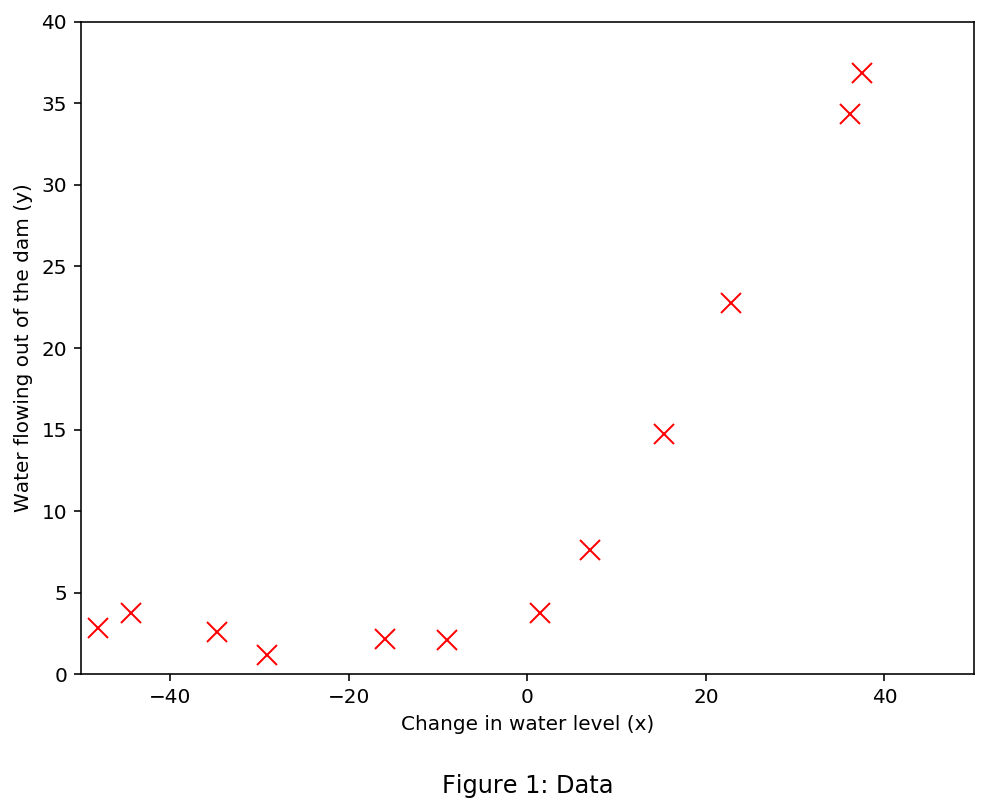

In [8]:
plotData(X,y,fig_dt)

## 1.2 Regularized linear regression cost function

#### linearRegCostFunction------------------------------------------------------------------------

In [9]:
def linearRegCostFunction(theta,X, y,lambdA):       # y.shape=[12,1],Xw1=X with 1's
    m=len(y)
    
    H      = l_hyp(X,theta) # compute hypothesis
    error  = H-y  
    
    t1     = np.matmul(error,error.T)/(2*m)
    t2_reg = np.matmul(theta[1:].T,theta[1:])*lambdA/(2*m)
    
    cost=t1+t2_reg
    return cost

In [10]:
# Inputs for cost function
x_mat  = np.insert(X,0,1,axis=1)
n      = x_mat.shape[1]
y      = y.flatten()
lambdA = 1
itheta = np.ones(n)

# cost 
cost = linearRegCostFunction(theta=itheta, X=x_mat, y=y, lambdA=1)
print 'Computed cost:', cost, '\n',\
      'Expected cost: 303.993'

Computed cost: 303.99319222 
Expected cost: 303.993


## 1.3 Regularized linear regression gradient

#### linearRegGradientFunction--------------------------------------------------------------------------------------------------------------

In [11]:
# All in inputs to cost and gradient function include an array of 1's
def linearRegGradientFunction(theta, X, y,lambdA):       # X here includes an array of 1's
    m = len(y)
    H      = l_hyp(X,theta)
    t1     = np.matmul(X.T,(H-y))/m
    t2_reg = (lambdA/m)*theta
    t2_reg[0] = 0                      # Set theta[0]=0: bias term
    gradient = t1+t2_reg
    return gradient

In [12]:
gradient=linearRegGradientFunction(itheta, X=x_mat, y=y, lambdA=1)
print 'Computed gradient:', gradient, '\n',\
      'Expected gradient: [-15.30; 598.250]'

Computed gradient: [ -15.30301567  598.25074417] 
Expected gradient: [-15.30; 598.250]


## 1.4 Fitting linear regression

In [13]:
# scipy.optimize.fmin_cg (blackbox optimizer) 
def trainLinearReg(theta, X, y, lambdA, iters=100, display=True):
    fn_opt = sop.fmin_cg(linearRegCostFunction,x0=theta,args=(X,y,lambdA), \
                       fprime=linearRegGradientFunction, maxiter=100,disp=display)
    return fn_opt

In [14]:
theta_op=trainLinearReg(theta=itheta, X=x_mat, y=y, lambdA=1)
print 'Optimized theta: ',theta_op 

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28
Optimized theta:  [ 13.08771802   0.36774202]


In [15]:
def plotFit(theta,X):
    X=np.sort(X, axis=0, kind='mergesort')      # sort X before plotting  
    yp=l_hyp(X,theta)                           # predict values
    plt.plot(X[:,1],yp,'b--')                    # plot model

In [16]:
# configure plot variables
fig_dt['title']='Figure 2: Linear Fit'
fig_dt['limits']=[-50,40,-5,40]

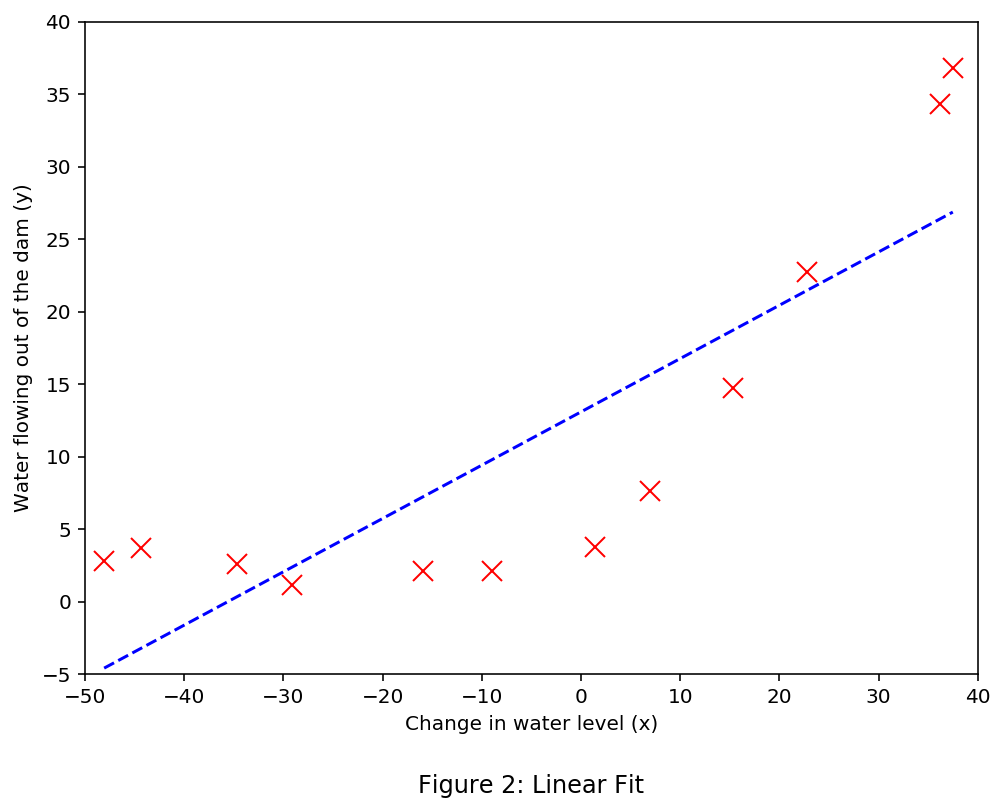

In [17]:
# generate plots
plotData(X.flatten(),y.flatten(),fig_dt)
plotFit(theta_op,X=x_mat)

##  2 Bias-variance

## 2.1 Learning curves

In [18]:
def learningCurve(X,y,Xval,yval,lambdA):
    ''' 
    We will now train the model on subsets of the the training set by selecting 
    1,2..,12 entries in a subset.
    Then we test ot model on cross validation set and determine the mean square error'''  
    
    m=X.shape[0]
    n=X.shape[1]
    itheta=np.zeros(n)
    
    err_train=[]
    err_val=[]
    set_size=[]
    
    for i in np.arange(1,(m+1), 1):
        xt=X[:i,:]
        yt=y[:i]
        
        # Train model parameters
        theta_op=trainLinearReg(theta=itheta, X=xt, y=yt, lambdA=lambdA,display=False)
        
        # Compute errors
        err_t  = linearRegCostFunction(theta=theta_op, X=xt, y=yt, lambdA=0)
        err_v =  linearRegCostFunction(theta=theta_op, X=Xval, y=yval, lambdA=0)
        
        # Append errors
        err_train.append(err_t)
        err_val.append(err_v)
        set_size.append(i)
          
    return err_train, err_val, set_size    

In [19]:
# Inset ones in cross validation set
xv_mat = np.insert(Xval,0,1,axis=1)
yv     = yval.flatten()  
lambdA = 1 

In [20]:
error_train, error_val, set_size = learningCurve(x_mat,y=y, Xval=xv_mat,yval=yv, lambdA=lambdA)

In [21]:
def plotLearningCurve(train_error, cross_val_error, size, fig_dt):
    plt.figure(figsize=fig_dt['figspan'])
    plt.hold=True
    
    plt.plot(size,train_error, 'b', label = fig_dt['label'][0], lw=fig_dt['lw'])
    plt.plot(size, cross_val_error, 'g', label = fig_dt['label'][1], lw=fig_dt['lw'])
        
    plt.xlabel(fig_dt['xlabel'])
    plt.ylabel(fig_dt['ylabel'])
    
    plt.axis(fig_dt['limits']) 
    plt.title(fig_dt['title'],y=fig_dt['title_pos'])
    if fig_dt['legend']==True:plt.legend()

In [22]:
# Configure plot variables: Create another dictionary for plot variables for learning curve
fig_dt1 = fig_details(limits=[0, 13, 0, 100], figspan=(8,6), \
                      xlabel='Number of training examples', ylabel='Error', \
                      label=['Train','Cross Validation'], marker=['b-','g-'], \
                      title='Figure 3: Linear regression learning curve', legend=True)

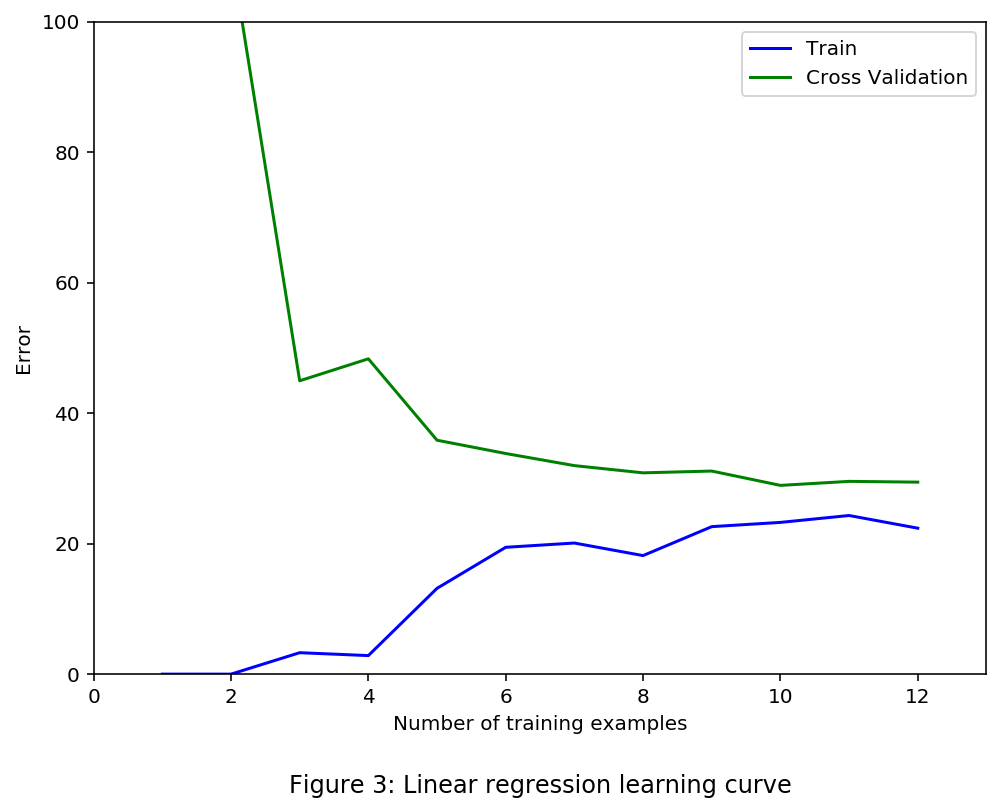

In [23]:
plotLearningCurve(error_train, error_val, set_size, fig_dt1)

## 3.  Polynomial regression  

In [24]:
def featureNormalize(x): 
    columnWiseMean   = np.mean(x,axis=0)                # mean of individuL features
    columnWiseStdDev = np.std(x,axis=0)                 # standard dev of inddivial features
    xn = (x-columnWiseMean)/columnWiseStdDev            # xn: normalize x        
    return xn, columnWiseMean, columnWiseStdDev         

def polyFeatures(X,degree):
    x_poly = X
    for i in np.arange(2,degree+1,1):
        x_poly = np.c_[x_poly,X**i]
    if degree<2: 
        x_poly.reshape((len(x_poly),1))

    return x_poly

In [25]:
degree=8
xpoly = polyFeatures(X,degree=8)
xpoly_n ,mu, sigma = featureNormalize(xpoly)
x_mat = np.insert(xpoly_n,0,1,axis=1)
print x_mat.shape

(12L, 9L)


In [26]:
# fmin_cg failed to converge so I used BFGS insteady
def trainLinearReg1(theta, X, y, lambdA,iters=50,display=False):
    fn_opt = sop.fmin_bfgs(linearRegCostFunction,x0=theta,args=(X,y,lambdA), \
                       fprime=linearRegGradientFunction, maxiter=iters,disp=display)
    return fn_opt

In [27]:
n      = x_mat.shape[1]
itheta = np.zeros(n) 
lambdA =0

theta_op=trainLinearReg1(theta=itheta, X=x_mat, y=y, lambdA=lambdA,iters=100,display=True)
theta_op.shape

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 77
         Function evaluations: 78
         Gradient evaluations: 78


(9L,)

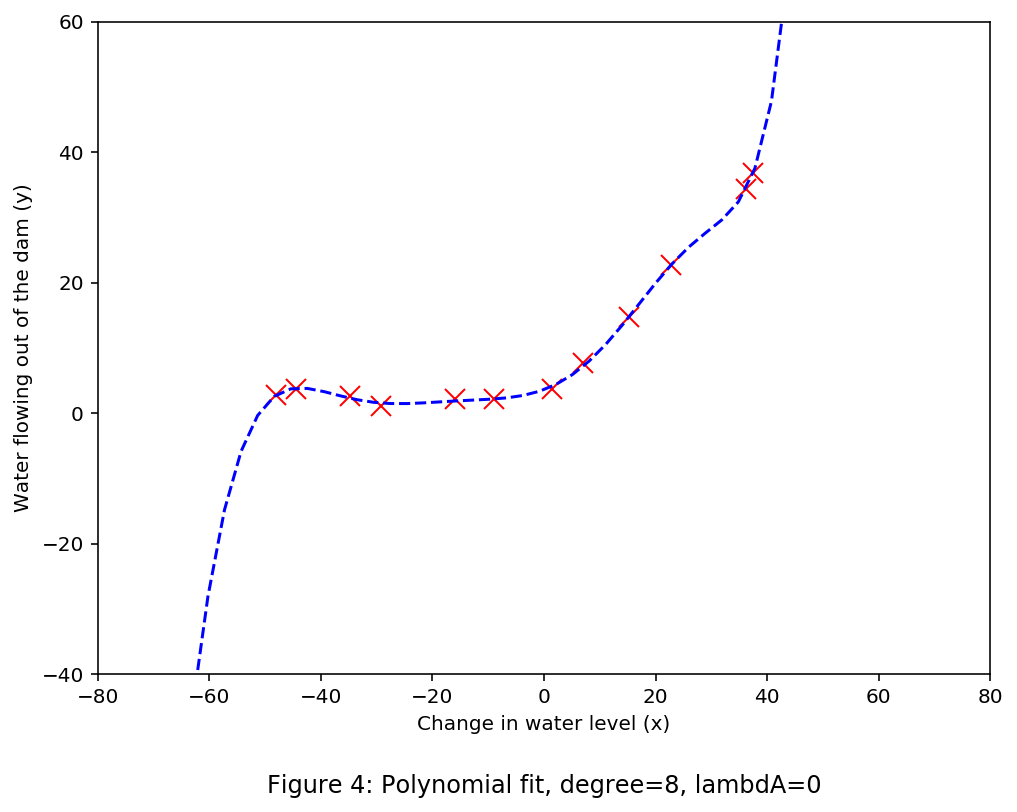

In [28]:
# Generate a range of x values and genearate features
xp=np.linspace(min(X)-30,max(X)+30,50).reshape((50,1))
xpoly = polyFeatures(xp,degree=8)
   
    
# Normalize features uisng computed mu and sigma from step 2
xpoly_n =(xpoly-mu)/sigma
   
xpy_mat = np.insert(xpoly_n,0,1,axis=1)
    
# Compute Hypothesis
ypoly=l_hyp(xpy_mat,theta_op)

# plot data 
fig_dt['limits']=[-80,80,-40,60]
fig_dt['title'] = 'Figure 4: Polynomial fit, degree=8, lambdA=0'
fig_dt['xlabel']= 'Change in water level (x)'
fig_dt['ylabel']= 'Water flowing out of the dam (y)'

plotData(X,y,fig_dt)
plt.plot(xp,ypoly,'b--')

This curve does not match the one in the exercise files. The difference is the cutve likely to arise friom the  implementations of the optimizing functions is either matlab/OCtave. However, it fits  the data clearly. This is an excellent example of the model overfitting the data.  I have complied the above process into plotFit1 function. Lets experiment with the different degrees to see if we get something close to figure in exercise files.

In [38]:
'''
Step 1: Set degree and generate features for training data
Step 2: Carryout feature normalization
Step 3: Specify input paramaters for optimizer 
Step 4: Train the model
Step 5: Generate a range of x values and genearate features
Step 6: Normalize features uisng computed mu and sigma from step 2
step 7: Generate Hypothesis
Step 8: Plot the data

'''

def plotFit1(X,y,d,lambdA):
    # Step 1: Step 1: Set degree and generate features for training data
    xpoly = polyFeatures(X,degree=d)

    # Step 2: Carryout feature normalization
    xpoly_n ,mu, sigma = featureNormalize(xpoly)
     
    # Step 3: Specify input paramaters for optimizer and train the model
    x_mat = np.insert(xpoly_n,0,1,axis=1)  # Insert array of 1's
    y=y.flatten()
    n      = x_mat.shape[1]
    itheta = np.zeros(n) 
    lambdA = lambdA
   
    # Step 4: Train the model
    theta_op=trainLinearReg1(theta=itheta, X=x_mat, y=y, lambdA=lambdA,iters=100,display=False)
    theta_op.shape
    
    # Step 5: Generate a range of x values and genearate features
    xp=np.linspace(min(X)-30,max(X)+30,50).reshape((50,1))
    xpoly = polyFeatures(xp,degree=d)
   
    
    #Step 6: Normalize features uisng computed mu and sigma from step 2
    xpoly_n =(xpoly-mu)/sigma
   
    xpy_mat = np.insert(xpoly_n,0,1,axis=1)
    
    # step 7: Compute Hypothesis
    ypoly=l_hyp(xpy_mat,theta_op)
    #print xp_mat.shape,ypoly.shape
 
    # Step 8: Plot the data
    plotData(X,y,fig_dt)
    plt.plot(xp,ypoly,'b--')
    
    return mu,sigma, x_mat

#### Function to visualize model fitting

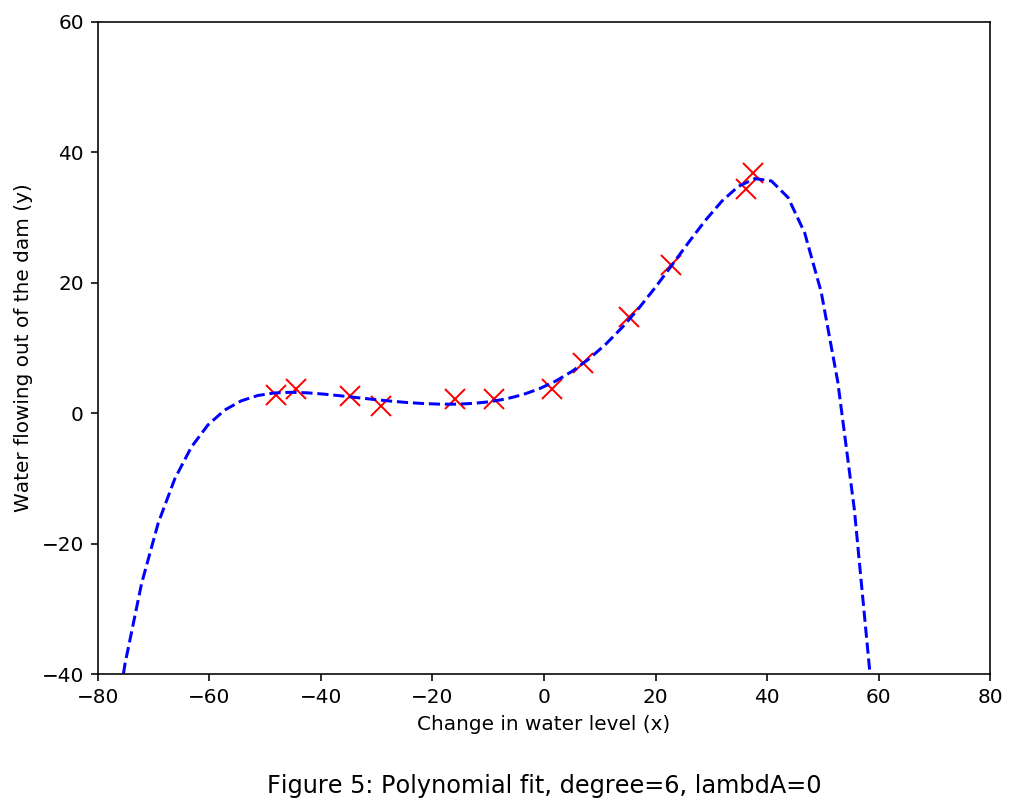

In [39]:
fig_dt['limits']=[-80,80,-40,60]
fig_dt['title'] = 'Figure 5: Polynomial fit, degree=6, lambdA=0'
fig_dt['xlabel']= 'Change in water level (x)'
fig_dt['ylabel']= 'Water flowing out of the dam (y)'

mu,sigma, x_mat=plotFit1(X,y,d=6,lambdA=0)

This is similar to the figure so lets move ahead with degree=6.

In [40]:
# Generate polynomial features for cross validation set
xv     = polyFeatures(Xval,6)
xv     = (xv-mu)/sigma
xv_mat = np.insert(xv,0,1,axis=1)
yv     = yval.flatten()
y=y.flatten()
lambdA=0

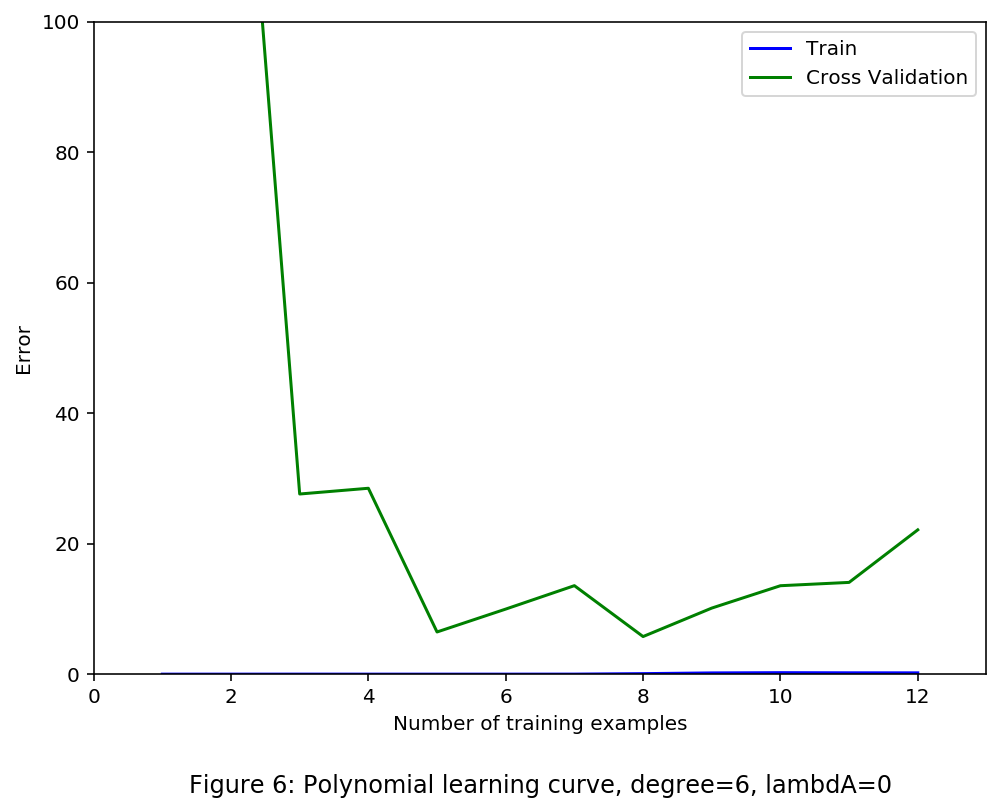

In [41]:
fig_dt1['title']= 'Figure 6: Polynomial learning curve, degree=6, lambdA=0'
# execute learningCurve and plotLearningcurve
error_train, error_val, set_size = learningCurve(x_mat,y=y, Xval=xv_mat,yval=yv, lambdA=lambdA) 
plotLearningCurve(error_train, error_val, set_size, fig_dt1)

##  Selecting lambdA using a cross validation set

In [ ]:
plotGenerator(X,y,Xval,yval,d=5,lambdA=0)

## 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter 

In [51]:
'''
Inputs: X, Xval are matrices normalized with ones
        flattened y, yval  
'''
def select_lambdA(X,y,Xval,yval,lambdA_mat):
    
    l_err_train = []
    l_err_val   = []
    l_set_size  = []
    for i in np.arange(len(lambdA_mat)):
        itheta=np.zeros(x_mat.shape[1])
        theta_op=trainLinearReg1(theta=itheta, X=x_mat, y=y, lambdA=lambdA_mat[i],\
                                 iters=100,display=False)

        err_t  = linearRegCostFunction(theta=theta_op, X=x_mat, y=y.flatten(), lambdA=0)
        err_v =  linearRegCostFunction(theta=theta_op, X=xv_mat, y=yval.flatten(), lambdA=0)

        # Append errors
        l_err_train.append(err_t)
        l_err_val.append(err_v)
        l_set_size.append(lambdA_mat[i])
  
    plotLearningCurve(l_err_train, l_err_val, l_set_size, fig_dt1)

In [55]:
'''
Step 1: Set degree and generate features for training data
Step 2: Carryout feature normalization
Step 3: Specify input paramaters for optimizer 
Step 4: Train the model
Step 5: Generate a range of x values and genearate features
Step 6: Normalize features uisng computed mu and sigma from step 2
step 7: Generate Hypothesis
Step 8: Plot the data
Step 9: Generate features for cross-validation set 
Step 10: Calculate training error and cross validation error
Step 11: Generate the plot 
# Step 12: Run optimization on entire training set for various values of lambdA
'''

def plotFit2(X,y,Xval,yval,d,lambdA):
    # Step 1: Step 1: Set degree and generate features for training data
    xpoly = polyFeatures(X,degree=d)

    # Step 2: Carryout feature normalization
    xpoly_n ,mu, sigma = featureNormalize(xpoly)
     
    # Step 3: Specify input paramaters for optimizer and train the model
    x_mat = np.insert(xpoly_n,0,1,axis=1)  # Insert array of 1's
    y=y.flatten()
    n      = x_mat.shape[1]
    itheta = np.zeros(n) 
    lambdA = lambdA
   
    # Step 4: Train the model
    theta_op=trainLinearReg1(theta=itheta, X=x_mat, y=y, lambdA=lambdA,iters=100,display=False)
    theta_op.shape
#----------------------------------------------------------------------#    
    # Step 5: Generate a range of x values and genearate features
    xp=np.linspace(min(X)-30,max(X)+30,50).reshape((50,1))
    xpoly = polyFeatures(xp,degree=d)
   
    
    #Step 6: Normalize features uisng computed mu and sigma from step 2
    xpoly_n =(xpoly-mu)/sigma
   
    xpy_mat = np.insert(xpoly_n,0,1,axis=1)
    
    # step 7: Compute Hypothesis
    ypoly=l_hyp(xpy_mat,theta_op)
    #print xp_mat.shape,ypoly.shape
 
    # Step 8: Plot the data
    plotData(X,y,fig_dt)
    plt.plot(xp,ypoly,'b--')
#---------------------------------------------------------------------------#    
    # Step 9: Generate features for cross-validation set 
    xv=polyFeatures(Xval,d)
    xv=(xv-mu)/sigma
    xv_mat=np.insert(xv,0,1,axis=1)
    yv=yval.flatten()
    
    # Step 10: Calculate training error and cross validation error
    error_train, error_val, set_size = learningCurve(x_mat,y=y, Xval=xv_mat,yval=yv, lambdA=lambdA) 
    
    fig_dt1['xlabel'] = 'Error'
    fig_dt1['title']  = 'Figure 8: Polynomial learning curve, degree=6, lambdA=0'
    fig_dt1['limits']  = [0,13,0,100]
    # Step 11: Generate the plot 
    plotLearningCurve(error_train, error_val, set_size, fig_dt1)
#---------------------------------------------------------------------------#
    
    fig_dt1['xlabel'] = 'lambdA'
    fig_dt1['title']  = 'Figure 9: Selecting lambdA using a cross validation set'
    fig_dt1['limits']  = [0,10,0,20]
    lambdA_mat=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
    # Step 12: Run optimization on entire training set for various values of lambdA
    select_lambdA(X=x_mat,y=y.flatten(),\
                   Xval=xv_mat,yval=yval.flatten(),lambdA_mat=lambdA_mat) 

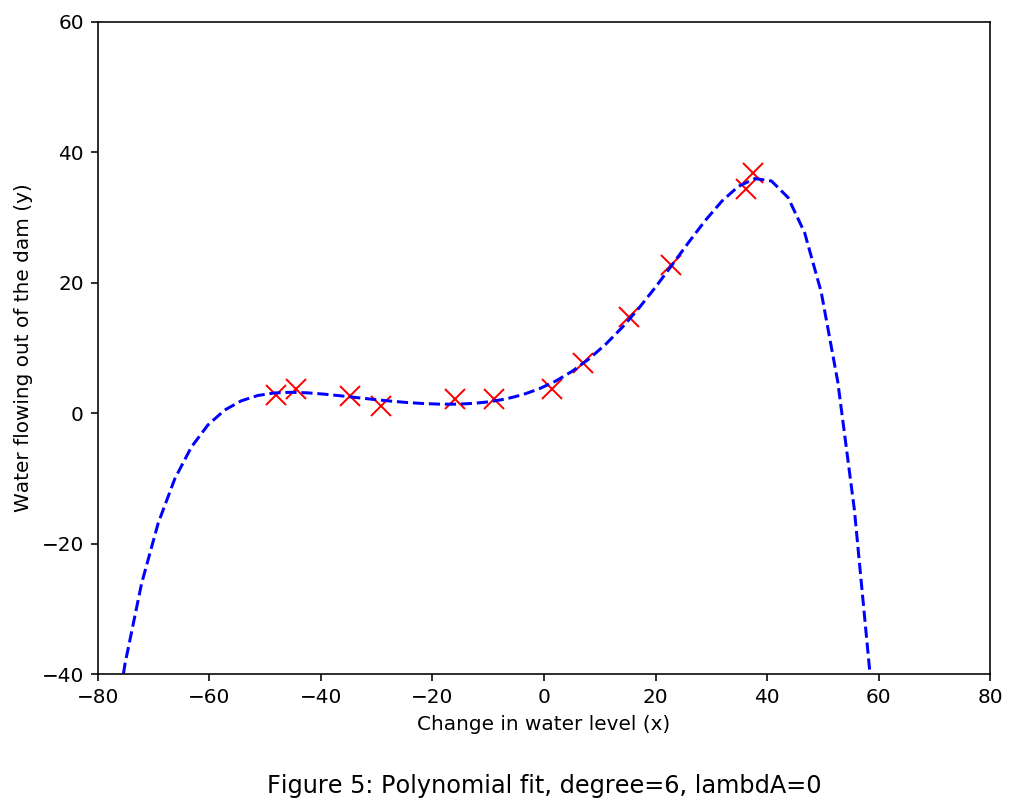

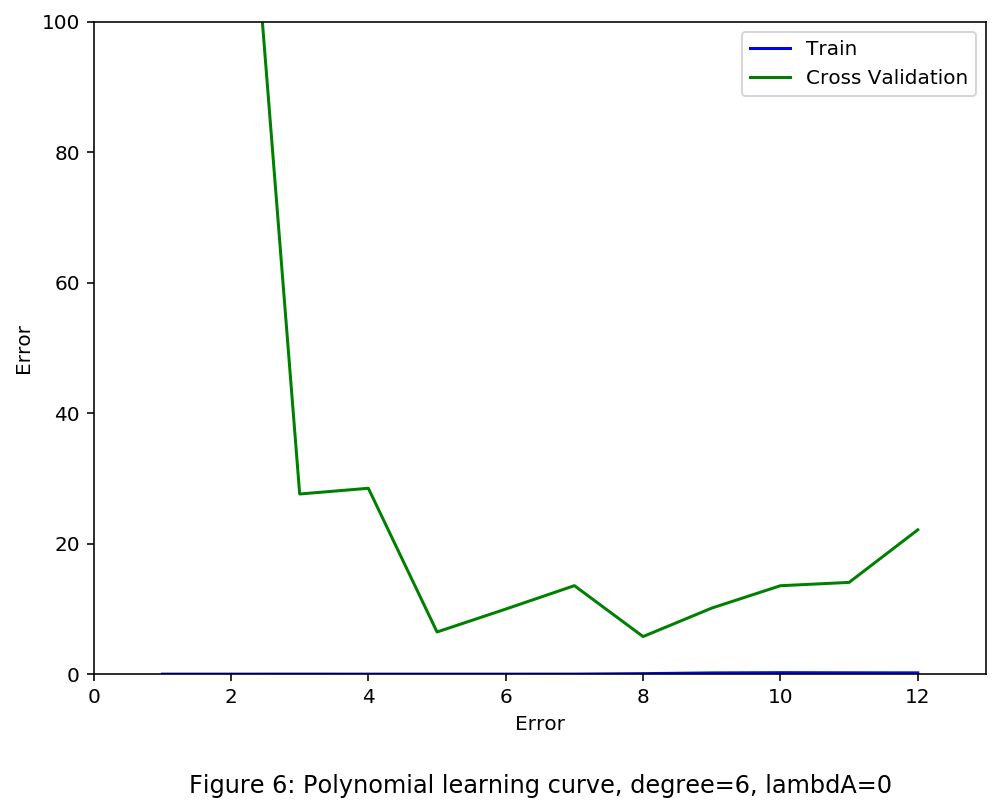

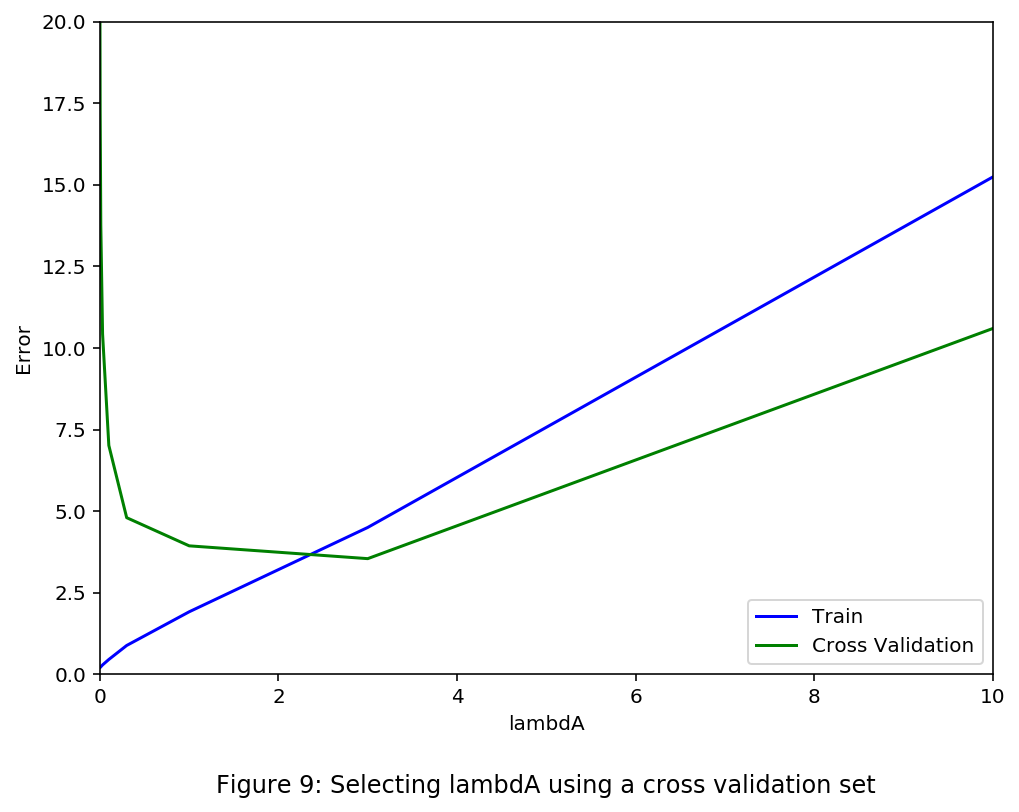

In [56]:
plotFit2(X,y,Xval,yval,d=6,lambdA=0)           